In [1]:
# original code from: https://cellpose.readthedocs.io/en/latest/notebook.html
# adapted by Anna B. Hamacher, HHU

import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io
from cellpose import models, io

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(model_type='cyto2')

# Load image file names
path = "."
rawfiles = os.listdir(path)

files_Cells = []
files_Nuclei = []

for file in rawfiles:
    if ("-ch1" in file) and (file.endswith(".tiff")):
        files_Cells.append(file)
    if ("-ch2" in file) and (file.endswith(".tiff")):
        files_Nuclei.append(file)

if len(files_Cells) != len(files_Nuclei):
    print("Error: incomplete image datasets. Missing single channel files. Aborting...")
else:
    nimgs = len(files_Cells)
    print("INFO: " + str(nimgs) + " image datasets found.")
    
    # Merge filename list into one big list
    files = []
    for i in range(nimgs):
        files.append([files_Cells[i], files_Nuclei[i]])
    
    # RUN CELLPOSE

    # DEFINE CELLPOSE MODEL
    # model_type='cyto' or model_type='nuclei'
    # cyto2 works two channels (cytoplasm + nuclei)
    model = models.Cellpose(gpu=False, model_type='cyto2')

    chan = [[0,1]]

    # or in a loop
    for (channel1, channel2) in files:
        index = files_Cells.index(channel1)
        pos = index + 1
        print ("INFO: Processing image dataset: "+ str(pos) + "/" + str(nimgs))
        print ("INFO: Processing files: " + channel1 + ", " + channel2)
       
        # Read both channel files
        img1 = io.imread(channel1)
        img2 = io.imread(channel2)
        
        # Merge single channels into one multi-channel image
        # Create a blank image that has two channels and the same number of pixels as your original input
        multi_channel_img = np.zeros((img1.shape[0], img1.shape[1], 2))

        # Add the channels to the needed image one by one
        multi_channel_img [:,:,0] = img1
        multi_channel_img [:,:,1] = img2
        
        # default: flow_threshold=0.4
        # run 6
        masks, flows, styles, diams = model.eval(multi_channel_img, diameter=75, channels=chan, flow_threshold=0.6, cellprob_threshold=-1.0)

        # save results so you can load in gui
        #io.masks_flows_to_seg(multi_channel_img, masks, flows, diams, files_Cells[index], chan)

        # save results as png
        io.save_to_png(multi_channel_img, masks, flows, files_Cells[index])

2021-08-06 22:04:51,738 [INFO] WRITING LOG OUTPUT TO C:\Users\jusch\.cellpose\run.log
2021-08-06 22:04:51,767 [INFO] >>>> using CPU
INFO: 240 image datasets found.
2021-08-06 22:04:51,836 [INFO] >>>> using CPU
INFO: Processing image dataset: 1/240
INFO: Processing files: r02c02f01p01-ch1sk1fk1fl1_B02.tiff, r02c02f01p03-ch2sk1fk1fl1_B02.tiff
2021-08-06 22:04:52,002 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:05:22,616 [INFO] >>>> TOTAL TIME 30.61 sec
INFO: Processing image dataset: 2/240
INFO: Processing files: r02c02f02p01-ch1sk1fk1fl1_B02.tiff, r02c02f02p03-ch2sk1fk1fl1_B02.tiff
2021-08-06 22:05:30,945 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:06:05,684 [INFO] >>>> TOTAL TIME 34.74 sec
INFO: Processing image dataset: 3/240
INFO: Processing files: r02c02f03p01-ch1sk1fk1fl1_B02.tiff, r02c02f03p03-ch2sk1fk1fl1_B02.tiff
2021-08-06 22:06:17,335 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:06:47,805 [INFO] >>>> TOTAL TIME 30.47 sec
INFO: Processing image dataset: 4/240
INFO: Processing files:

2021-08-06 22:26:53,309 [INFO] >>>> TOTAL TIME 32.57 sec
INFO: Processing image dataset: 34/240
INFO: Processing files: r02c10f02p01-ch1sk1fk1fl1_B10.tiff, r02c10f02p03-ch2sk1fk1fl1_B10.tiff
2021-08-06 22:27:02,969 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:27:36,091 [INFO] >>>> TOTAL TIME 33.12 sec
INFO: Processing image dataset: 35/240
INFO: Processing files: r02c10f03p01-ch1sk1fk1fl1_B10.tiff, r02c10f03p03-ch2sk1fk1fl1_B10.tiff
2021-08-06 22:27:46,951 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:28:18,893 [INFO] >>>> TOTAL TIME 31.94 sec
INFO: Processing image dataset: 36/240
INFO: Processing files: r02c10f04p01-ch1sk1fk1fl1_B10.tiff, r02c10f04p03-ch2sk1fk1fl1_B10.tiff
2021-08-06 22:28:28,910 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:29:00,094 [INFO] >>>> TOTAL TIME 31.18 sec
INFO: Processing image dataset: 37/240
INFO: Processing files: r02c11f01p01-ch1sk1fk1fl1_B11.tiff, r02c11f01p03-ch2sk1fk1fl1_B11.tiff
2021-08-06 22:29:09,573 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:29:41,983 

2021-08-06 22:49:33,692 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:50:09,047 [INFO] >>>> TOTAL TIME 35.36 sec
INFO: Processing image dataset: 68/240
INFO: Processing files: r03c08f04p01-ch1sk1fk1fl1_C08.tiff, r03c08f04p03-ch2sk1fk1fl1_C08.tiff
2021-08-06 22:50:19,512 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:50:57,758 [INFO] >>>> TOTAL TIME 38.25 sec
INFO: Processing image dataset: 69/240
INFO: Processing files: r03c09f01p01-ch1sk1fk1fl1_C09.tiff, r03c09f01p03-ch2sk1fk1fl1_C09.tiff
2021-08-06 22:51:10,212 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:51:48,338 [INFO] >>>> TOTAL TIME 38.13 sec
INFO: Processing image dataset: 70/240
INFO: Processing files: r03c09f02p01-ch1sk1fk1fl1_C09.tiff, r03c09f02p03-ch2sk1fk1fl1_C09.tiff
2021-08-06 22:52:01,020 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 22:52:40,863 [INFO] >>>> TOTAL TIME 39.84 sec
INFO: Processing image dataset: 71/240
INFO: Processing files: r03c09f03p01-ch1sk1fk1fl1_C09.tiff, r03c09f03p03-ch2sk1fk1fl1_C09.tiff
2021-08-06 22:52:53,423 

2021-08-06 23:15:48,065 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:16:23,443 [INFO] >>>> TOTAL TIME 35.38 sec
INFO: Processing image dataset: 102/240
INFO: Processing files: r04c07f02p01-ch1sk1fk1fl1_D07.tiff, r04c07f02p03-ch2sk1fk1fl1_D07.tiff
2021-08-06 23:16:34,432 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:17:08,838 [INFO] >>>> TOTAL TIME 34.41 sec
INFO: Processing image dataset: 103/240
INFO: Processing files: r04c07f03p01-ch1sk1fk1fl1_D07.tiff, r04c07f03p03-ch2sk1fk1fl1_D07.tiff
2021-08-06 23:17:17,777 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:17:50,734 [INFO] >>>> TOTAL TIME 32.96 sec
INFO: Processing image dataset: 104/240
INFO: Processing files: r04c07f04p01-ch1sk1fk1fl1_D07.tiff, r04c07f04p03-ch2sk1fk1fl1_D07.tiff
2021-08-06 23:17:59,178 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:18:32,461 [INFO] >>>> TOTAL TIME 33.28 sec
INFO: Processing image dataset: 105/240
INFO: Processing files: r04c08f01p01-ch1sk1fk1fl1_D08.tiff, r04c08f01p03-ch2sk1fk1fl1_D08.tiff
2021-08-06 23:18:40,

INFO: Processing image dataset: 135/240
INFO: Processing files: r05c05f03p01-ch1sk1fk1fl1_E05.tiff, r05c05f03p03-ch2sk1fk1fl1_E05.tiff
2021-08-06 23:42:25,857 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:43:01,131 [INFO] >>>> TOTAL TIME 35.27 sec
INFO: Processing image dataset: 136/240
INFO: Processing files: r05c05f04p01-ch1sk1fk1fl1_E05.tiff, r05c05f04p03-ch2sk1fk1fl1_E05.tiff
2021-08-06 23:43:10,825 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:43:45,289 [INFO] >>>> TOTAL TIME 34.46 sec
INFO: Processing image dataset: 137/240
INFO: Processing files: r05c06f01p01-ch1sk1fk1fl1_E06.tiff, r05c06f01p03-ch2sk1fk1fl1_E06.tiff
2021-08-06 23:43:54,516 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:44:32,470 [INFO] >>>> TOTAL TIME 37.95 sec
INFO: Processing image dataset: 138/240
INFO: Processing files: r05c06f02p01-ch1sk1fk1fl1_E06.tiff, r05c06f02p03-ch2sk1fk1fl1_E06.tiff
2021-08-06 23:44:43,876 [INFO] ~~~ FINDING MASKS ~~~
2021-08-06 23:45:20,932 [INFO] >>>> TOTAL TIME 37.06 sec
INFO: Processing ima

2021-08-07 00:06:55,489 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:07:26,809 [INFO] >>>> TOTAL TIME 31.32 sec
INFO: Processing image dataset: 169/240
INFO: Processing files: r06c04f01p01-ch1sk1fk1fl1_F04.tiff, r06c04f01p03-ch2sk1fk1fl1_F04.tiff
2021-08-07 00:07:36,442 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:08:08,817 [INFO] >>>> TOTAL TIME 32.38 sec
INFO: Processing image dataset: 170/240
INFO: Processing files: r06c04f02p01-ch1sk1fk1fl1_F04.tiff, r06c04f02p03-ch2sk1fk1fl1_F04.tiff
2021-08-07 00:08:18,657 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:08:50,624 [INFO] >>>> TOTAL TIME 31.97 sec
INFO: Processing image dataset: 171/240
INFO: Processing files: r06c04f03p01-ch1sk1fk1fl1_F04.tiff, r06c04f03p03-ch2sk1fk1fl1_F04.tiff
2021-08-07 00:09:00,486 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:09:35,267 [INFO] >>>> TOTAL TIME 34.78 sec
INFO: Processing image dataset: 172/240
INFO: Processing files: r06c04f04p01-ch1sk1fk1fl1_F04.tiff, r06c04f04p03-ch2sk1fk1fl1_F04.tiff
2021-08-07 00:09:46,

INFO: Processing image dataset: 202/240
INFO: Processing files: r07c02f02p01-ch1sk1fk1fl1_G02.tiff, r07c02f02p03-ch2sk1fk1fl1_G02.tiff
2021-08-07 00:30:54,179 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:31:26,089 [INFO] >>>> TOTAL TIME 31.91 sec
INFO: Processing image dataset: 203/240
INFO: Processing files: r07c02f03p01-ch1sk1fk1fl1_G02.tiff, r07c02f03p03-ch2sk1fk1fl1_G02.tiff
2021-08-07 00:31:35,595 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:32:11,314 [INFO] >>>> TOTAL TIME 35.72 sec
INFO: Processing image dataset: 204/240
INFO: Processing files: r07c02f04p01-ch1sk1fk1fl1_G02.tiff, r07c02f04p03-ch2sk1fk1fl1_G02.tiff
2021-08-07 00:32:21,750 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:32:56,470 [INFO] >>>> TOTAL TIME 34.72 sec
INFO: Processing image dataset: 205/240
INFO: Processing files: r07c03f01p01-ch1sk1fk1fl1_G03.tiff, r07c03f01p03-ch2sk1fk1fl1_G03.tiff
2021-08-07 00:33:07,879 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:33:43,598 [INFO] >>>> TOTAL TIME 35.72 sec
INFO: Processing ima

2021-08-07 00:53:53,029 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:54:23,352 [INFO] >>>> TOTAL TIME 30.32 sec
INFO: Processing image dataset: 236/240
INFO: Processing files: r07c10f04p01-ch1sk1fk1fl1_G10.tiff, r07c10f04p03-ch2sk1fk1fl1_G10.tiff
2021-08-07 00:54:33,636 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:55:01,335 [INFO] >>>> TOTAL TIME 27.70 sec
INFO: Processing image dataset: 237/240
INFO: Processing files: r07c11f01p01-ch1sk1fk1fl1_G11.tiff, r07c11f01p03-ch2sk1fk1fl1_G11.tiff
2021-08-07 00:55:09,678 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:55:40,034 [INFO] >>>> TOTAL TIME 30.36 sec
INFO: Processing image dataset: 238/240
INFO: Processing files: r07c11f02p01-ch1sk1fk1fl1_G11.tiff, r07c11f02p03-ch2sk1fk1fl1_G11.tiff
2021-08-07 00:55:50,057 [INFO] ~~~ FINDING MASKS ~~~
2021-08-07 00:56:20,318 [INFO] >>>> TOTAL TIME 30.26 sec
INFO: Processing image dataset: 239/240
INFO: Processing files: r07c11f03p01-ch1sk1fk1fl1_G11.tiff, r07c11f03p03-ch2sk1fk1fl1_G11.tiff
2021-08-07 00:56:30,

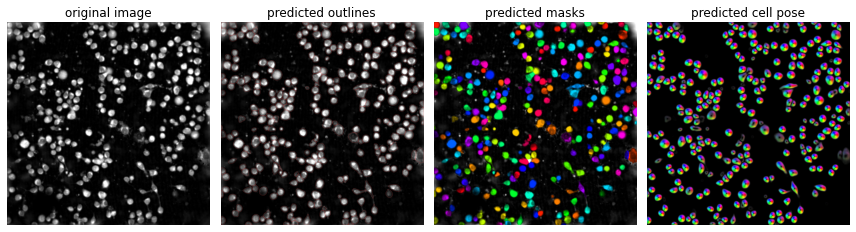

In [3]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img1, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()